# Assignment-1 Deep Learning AI2100

## Name-Gunjit Mittal        Roll No.-AI21BTECH11011

In [50]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Q1 Perceptron Learning Algorithm

### Generating dataset

In [51]:
def generate_lin_sep_point(m,c,gamma):
    """
        Generates a random point with corresponding label
        and returns a list as the output 
    """
    x = 30*np.random.random()-15
    label = np.random.random()
    dis = 50*np.random.random()
    if label>=0.5:
        label = 1
    else:
        label = -1
    return [x,m*x+c+(gamma+dis)*label,1,label]

In [52]:
def generate_lin_sep_dataset(m,c,gamma,data_size):
    """
        Uses the generate_lin_sep_point function and uses a for loop
        to generate and return a proper numpy dataset of the given size
    """
    X,y=[],[]
    for i in range( data_size):
        data = generate_lin_sep_point(m,c,gamma)
        X.append(data[:-1])
        y.append(data[-1:])
    X,y = np.array(X),np.array(y)
    return X,y

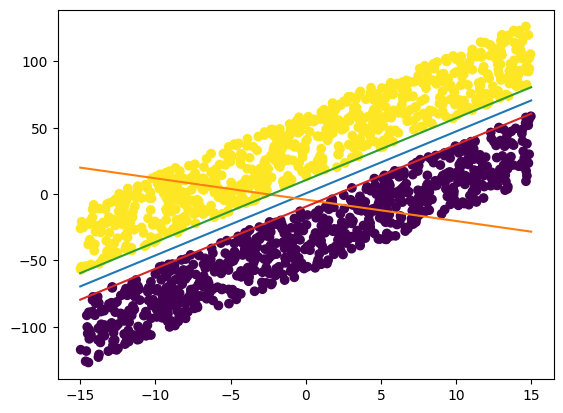

In [53]:
np.random.seed(4)
m,c = 10*np.random.random(2)-5 # generating random slope and intercept
gamma = 10
data_size = 1500 # size of dataset
X,y = generate_lin_sep_dataset(m,c,gamma,data_size)
w = np.random.rand(3) # Initialsing the weight vector

# Plotting the classifier before training
plt.scatter(X[:,0],X[:,1],c=y) 
x = np.linspace(-15,15,100) 
true = m*x+c # True classifier line
rec = -(w[0]/w[1])*x - (w[2]/w[1]) # The perceptron before training 
plt.plot(x,true) 
plt.plot(x,rec) 
plt.plot(x,true+gamma) # Plotting the level of separability lines
plt.plot(x,true-gamma)
plt.show()

### Perceptron Learning Algorithm

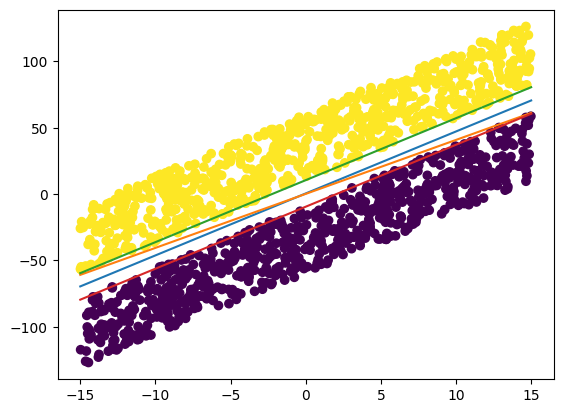

In [54]:
while(np.array_equal(y,np.where((X.dot(w).reshape(y.shape))>0,1,-1))==False): # Checking if the predicted array is not equal to labels
    for i in range(data_size): 
        if X[i].dot(w) * y[i] <= 0:
            w = w + y[i] * X[i] # Updating the weight vector for missclassified labels
            
# Plotting the classifier after training
plt.scatter(X[:,0],X[:,1],c=y) 
x = np.linspace(-15,15,100)
true = m*x+c
rec = -(w[0]/w[1])*x - (w[2]/w[1])
plt.plot(x,true)
plt.plot(x,rec)
plt.plot(x,true+gamma)
plt.plot(x,true-gamma)
plt.show()

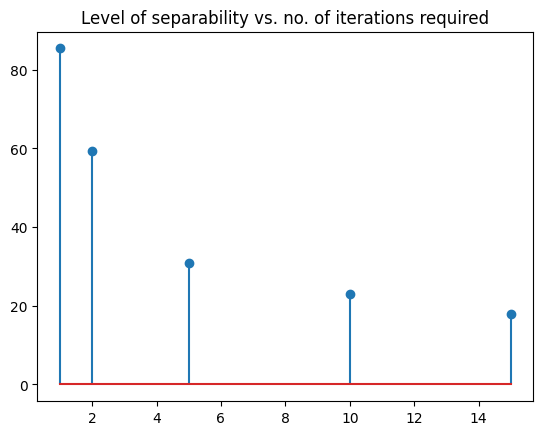

In [55]:
gamma_list=[1,2,5,10,15] # List of 5 gammas
iter_list = [] # List of average no. of iterations required
for gamma in gamma_list:
    iterations = 0
    for _ in range(15): # Average over 15 iterations
        w = np.random.rand(3)
        X,y = generate_lin_sep_dataset(m,c,gamma,data_size)
        while(np.array_equal(y,np.where((X.dot(w).reshape(y.shape))>0,1,-1))==False):
            for i in range(data_size):
                if X[i].dot(w) * y[i] <= 0:
                    w = w + y[i] * X[i]
                    iterations+=1
    iter_list.append(iterations/15) # Appending the average no, of iterations
plt.stem(gamma_list,iter_list)
plt.title("Level of separability vs. no. of iterations required")
plt.show()

### Analysis
From the level of separability cs no. of iterations graph we can see that as the separability increases the average no. of iterations required decreases which seems obvious as higher the separability of data the less precise the classifier needs to be and hence it converges earlier.

# Q2 Gradient descent for training a linear classifier

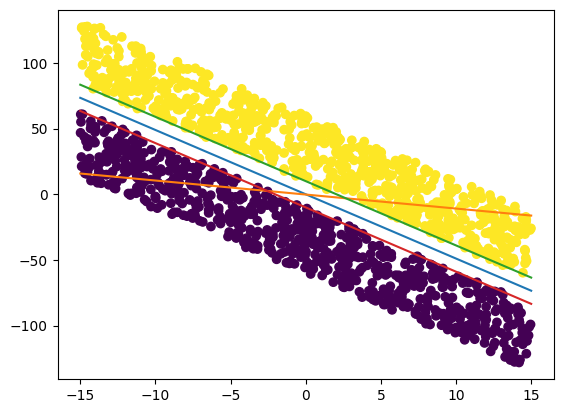

In [56]:
np.random.seed(9)
m,c = 10*np.random.random(2)-5 # generating random slope and intercept
gamma = 10
data_size = 1500 # size of dataset
X,y = generate_lin_sep_dataset(m,c,gamma,data_size)
w = np.random.rand(3) # Initialsing the weight vector

# Plotting the classifier before training
plt.scatter(X[:,0],X[:,1],c=y) 
x = np.linspace(-15,15,100) 
true = m*x+c # True classifier line
rec = -(w[0]/w[1])*x - (w[2]/w[1]) # The perceptron before training 
plt.plot(x,true) 
plt.plot(x,rec) 
plt.plot(x,true+gamma) # Plotting the level of separability lines
plt.plot(x,true-gamma)
plt.show()

### Loss formulation
Since we are dealing with binary classification hinge loss can be used as it gives a loss of 2 when misclassified but 0 error when correctly classified
$$ \begin{align}
L(y,\hat y) &= \max{(0,1 - y \hat y)}
\end{align}
$$

In [57]:
def hinge_loss(y, pred): 
    """
        Takes as input the labels and prediction and outputs the loss incurred on the dataset
    """
    size = y.shape[0]
    loss =  np.sum(np.maximum(0,1-np.multiply(y,pred)))/size
    return loss

### Gradient Computation
Gradient of the hinge loss function will be
$$\begin{align}
\frac{\partial L}{\partial \hat y} &= \begin{cases}
 -y & y \hat y < 1\\
 0 & otherwise
 \end{cases}
\end{align}$$
With respect to weight the loss will be 
$$\begin{align}
\frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \hat y} \times \frac{\partial \hat y}{\partial w} \\
\hat y &= X \times w\\
\frac{\partial \hat y}{\partial w} &= X\\
\therefore
\frac{\partial L}{\partial w} &= \begin{cases}
 -Xy & y \hat y < 1\\
 0 & otherwise
 \end{cases}
\end{align}$$

### Update equation
Given the derivative of the loss function, the analytical update equation becomes
$$\begin{align}
w = w - \alpha\times\frac{\partial L}{\partial w}
\end{align}$$
where $\alpha$ is the learning rate

In [58]:
alpha=0.1 # Learning rate
while(np.array_equal(y,np.where((X.dot(w).reshape(y.shape))>0,1,-1))==False):
    for i in range(data_size):
        predict = np.where((X[i].T)@w>0,1,-1) # obtaining y hat for X[i]
        if predict*y[i]<1:  # if not derivative will be 0 and there will be no meaning to do anything
            der = -y[i]*X[i] # derivative equation
            w = w - alpha*der # Update equation

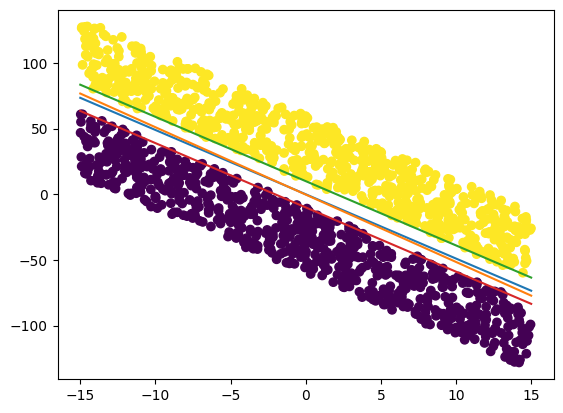

In [59]:
# plotting the rectifier after training
plt.scatter(X[:,0],X[:,1],c=y)
x = np.linspace(-15,15,100)
true = m*x+c
rec = -(w[0]/w[1])*x - (w[2]/w[1])
plt.plot(x,true)
plt.plot(x,rec)
plt.plot(x,true+gamma)
plt.plot(x,true-gamma)
plt.show()

# Q3 MLP with a single hidden layer

### Dataset Creation

In [60]:
def generate_non_lin_dataset(data_size):
    """
        Generates dataset with points in two concentric circles and
        returns an np array with both labels and features
    """
    theta = 2*np.pi*np.random.random(data_size)
    
    label = np.random.random(data_size)
    noise = np.random.random(data_size)
    noise2 = np.random.rand(data_size)
    x,x2=[],[]
    for i in range (data_size):
        if label[i]>0.5:   # If label = 1 then radius of circle is 3 
            label[i]=1
            x.append(3*np.cos(theta[i]))
            x2.append(3*np.sin(theta[i]))
        else:
            label[i]=-1   # else radius is 6
            x.append(6*np.cos(theta[i]))
            x2.append(6*np.sin(theta[i]))
    x,x2=np.array(x),np.array(x2)
    return np.vstack((x+noise,x2+noise2,np.ones(data_size),label)) # to add a bit more randomness to data a noise of size 1 is added

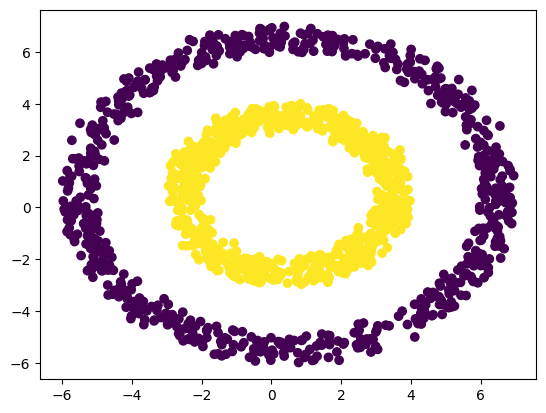

In [61]:
data_size = 1500 # data_size
np.random.seed(0)
data = generate_non_lin_dataset(data_size)
data = np.array(data).T
X=data[:,:-1]
y=data[:,-1:]
plt.scatter(X[:,0],X[:,1],marker='o',c=y ) #Plotting the data points with their true labels
plt.show()

### MLP definition
MLP stand for Multi Layer pereptron and as the name suggests it consists of multiple layers of perceptron stacked together each with their own biases and weight vectors

### Backprop
$$\begin{align}
\text{input} &= X \\
z_1 &= X.W_1 + b_1\\
a_1 &= RELU(z_1)\\
z_2 &= a_1.W_2 + b_2\\
output &= \hat y = sigmoid(z_2)
\end{align}$$


Then on the given $\hat y $ we can assign labels accordingly if $\hat y >0.5$ or not

For Backprop we need to find $ \frac{\partial L}{\partial W_2},\frac{\partial L}{\partial b_2},\frac{\partial L}{\partial W_1} \text{and} \frac{\partial L}{\partial b_1}  $
$$\begin{align}
\frac{\partial L}{\partial W_2} &= \frac{\partial L}{\partial z_2} \times \frac{\partial z_2}{\partial W_2} \\
\frac{\partial L}{\partial z_2} &= \frac{\partial L}{\partial \hat y} \times \frac{\partial \hat y}{\partial z_2}\\
\frac{\partial L}{\partial \hat y} &= \begin{cases}
 -y & y \hat y < 1\\
 0 & otherwise
 \end{cases}\\
 \frac{\partial \hat y}{\partial z_2} &= sigmoid'(z_2)\\
  \therefore \frac{\partial L}{\partial z_2} &= \begin{cases}
 -y\times sigmoid'(z_2) & y \hat y < 1\\
 0 & otherwise
 \end{cases}\\
 \frac{\partial z_2}{\partial W_2} &= a_1\\
 \therefore \frac{\partial L}{\partial W_2} &= \frac{\partial L}{\partial z_2} \times a_1
\end{align}$$

while
$$\begin{align}
    \frac{\partial L}{\partial b_2} &= \frac{\partial L}{\partial z_2} \times \frac{\partial z_2}{\partial b_2}\\
    \frac{\partial z_2}{\partial b_2} &= 1\\
    \therefore \frac{\partial L}{\partial b_2} &= \frac{\partial L}{\partial z_2} \times 1
\end{align}$$


Also
$$\begin{align}
    \frac{\partial L}{\partial W_1} &= \frac{\partial L}{\partial z_2} \times \frac{\partial z_2}{\partial z_1} \times  \frac{\partial z_1}{\partial W_1}\\
    \frac{\partial z_2}{\partial z_1} &= \frac{\partial z_2}{\partial a_1} \times \frac{\partial a_1}{\partial z_1}\\
    \frac{\partial z_2}{\partial a_1} &= W_2\\
    \frac{\partial a_1}{\partial z_1} &= RELU'(z_1)\\
    \therefore \frac{\partial z_2}{\partial z_1} &= W_2 \times RELU'(z_1)\\
    \frac{\partial z_1}{\partial W_1} &= X\\
    \therefore \frac{\partial L}{\partial W_1} &= \frac{\partial L}{\partial z_2} \times \frac{\partial z_2}{\partial z_1} \times  X\\
 \end{align}$$
 $$\begin{align}
 \frac{\partial L}{\partial b_1} &= \frac{\partial L}{\partial z_2} \times \frac{\partial z_2}{\partial z_1} \times  \frac{\partial z_1}{\partial b_1}\\
 \frac{\partial z_1}{\partial b_1} &= 1\\
 \therefore \frac{\partial L}{\partial b_1} &= \frac{\partial L}{\partial z_2} \times \frac{\partial z_2}{\partial z_1} \times  1\\
 \end{align}$$

In [62]:
class my_MLP():
    def __init__(self): # Initialising the values to random when creating object
        self.input_dim = 3
        self.hidden_dim = 5
        self.output_dim = 1
        self.W1 = np.random.rand(self.input_dim,self.hidden_dim)
        self.W2 = np.random.rand(self.hidden_dim,self.output_dim)
        self.b1 = np.random.rand(self.hidden_dim)
        self.b2 = np.random.rand(self.output_dim)
        
    def forward(self,x): # Passing the input through the MLP to generate the output
        self.z1 = np.matmul(x,self.W1)+self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.matmul(self.a1,self.W2)+self.b2
        self.y_hat = self.sigmoid(self.z2)
        return self.y_hat
        
    def sigmoid(self, q): # Activation function which reduces the final value to range of (0,1)
        return 1/(1+np.exp(-q))
    
    def relu(self,q): # Activation function to eliminate negative values
        return (np.maximum(0,q))
    
    def loss(self, y, pred): # Loss function which is just hinge loss
        size = y.shape[0]
        loss =  np.sum(np.maximum(0,1-np.multiply(y,pred)))/size
        return loss
        
    def backprop(self,X,y): # The backpropagation algorithm which computes the derivative at different depths in the MLP
        """
            Performing backprop with recursion as we start by calculating the gradient
            at the final layer and using that gradient we calculate the gradient with
            respect to the previous layers
        """
        predict = self.forward(X) 
        m = X.shape[0]
        dl_dy_hat= []  # Derivative of loss with respect to the prediction
        for i in range(y.shape[0]):
            if predict[i]*y[i]>=1:
                dl_dy_hat.append(0)
            else:
                dl_dy_hat.append(-y[i].item())
        dl_dy_hat = np.array(dl_dy_hat).reshape(self.z2.shape) 
        dl_dz2 = np.multiply(dl_dy_hat,self.sigmoid_prime(self.z2)) # Derivative of loss with respect to the output of output layer before activation
        self.dw2 = (1/m)*np.sum(np.multiply(self.a1, dl_dz2), axis=0).reshape(self.W2.shape)  # Derivative of loss with respect to Weight vector of hidden and ouput layer
        self.db2 = (1/m)*np.sum(dl_dz2,axis=0).reshape(self.b2.shape) # Derivative of loss with respect to biases of output layer
        dl_dz1 = (np.squeeze(dl_dz2)*self.W2).T*self.relu_prime(self.z1) # Derivative of loss with respect to output of hidden layer
        self.dw1 = (1/m)*np.dot(X.T, dl_dz1) # Derivative of loss with respect to Weight vector of input and hidden layer
        self.db1 = (1/m)*np.sum(dl_dz1,axis=0) # Derivative of loss with respect to biases of the hidden layer
    
    def sigmoid_prime(self, z): # Derivative of signmoid activation function
        return self.sigmoid(z)*(1-self.sigmoid(z))
     
    def relu_prime(self,q): # Derivative of relu activation function
        return np.where(q > 0, 1.0, 0.0)
    
    def update(self, learning_rate=1): # Updating the weights and biases with the derivatives obtained in backprop
        self.W1 = self.W1 - learning_rate*self.dw1
        self.W2 = self.W2 - learning_rate*self.dw2
        self.b1 = self.b1 - learning_rate*self.db1
        self.b2 = self.b2 - learning_rate*self.db2
        
    def train(self, X, y, iteration=1000): # Training the MLP
        for i in range(iteration):
            y_hat = self.forward(X)
            loss = self.loss(y_hat, y)
            self.backprop(X,y)
            self.update()

    def predict(self, X): # Predicting the label of the input
        pred = self.forward(X)
        pred = np.where(pred>=0.5,1,-1)
        return pred
        
    def score(self, predict, y): # Scoring the classifier on the labels and predicted labels
        cnt = np.sum(predict==y)
        return (cnt/len(y))

score before training:  0.5073333333333333
score after training:  1.0


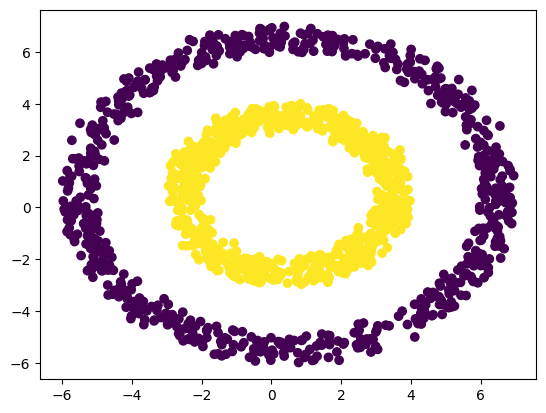

In [63]:
clr = my_MLP() #initialize the model
pre_y = clr.predict(X) # predict
score = clr.score(pre_y, y) # get the accuracy score
print('score before training: ', score)

clr.train(X, y) # train model
pre_y = clr.predict(X) 
score = clr.score(pre_y, y) 
print('score after training: ', score)

# Plotting the points with the predicted labels
plt.scatter(X[:,0],X[:,1],marker='o',c=pre_y )
plt.show()